In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.ensemble import (
    StackingClassifier, RandomForestClassifier, AdaBoostClassifier,
    ExtraTreesClassifier, HistGradientBoostingClassifier
)
from sklearn.linear_model import LogisticRegression, RidgeClassifierCV
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split, cross_val_predict
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import (
    accuracy_score, classification_report, confusion_matrix,
    precision_score, recall_score, f1_score
)

In [2]:
dataset1 = pd.read_csv('C:/Users/kashishpreet kaur/OneDrive/Desktop/Documents/DMA LAB/datasets/CO22339soiLMEASURES.csv')
X1 = dataset1.iloc[:, :-1].values
y1 = dataset1.iloc[:, -1].values

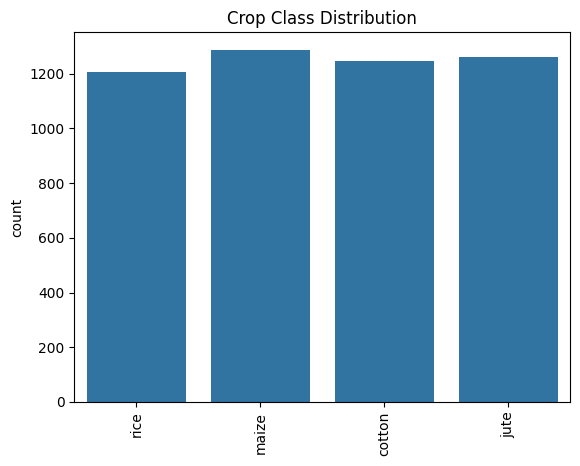

In [3]:
sns.countplot(x=y1)
plt.title("Crop Class Distribution")
plt.xticks(rotation=90)
plt.show()

In [4]:
dataset1.head()

,N,P,K,ph,crop
0,90,42,43,6.502985,rice
1,85,58,41,7.038096,rice
2,60,55,44,7.840207,rice
3,74,35,40,6.980401,rice
4,78,42,42,7.628473,rice


In [5]:
le = LabelEncoder()
y1 = le.fit_transform(y1)

In [6]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.25, random_state=0)


In [7]:
sc = StandardScaler()
X1_train = sc.fit_transform(X1_train)
X1_test = sc.transform(X1_test)

In [8]:
final_layer = StackingClassifier(
    estimators=[
        ('xgb', XGBClassifier(n_estimators=100, learning_rate=0.05, max_depth=4, reg_lambda=2, reg_alpha=2)),
        ('rf', RandomForestClassifier(n_estimators=100, max_depth=8, random_state=42)),
        ('svc', SVC(C=0.5, kernel='rbf', gamma=1e-3, probability=True))
    ],
    final_estimator=LogisticRegression(max_iter=500),
    passthrough=True,
    n_jobs=-1
)

# Define multi-layer stack
multi_layer_classifier = StackingClassifier(
    estimators=[
        ('ridge', RidgeClassifierCV()),
        ('logreg', LogisticRegression(max_iter=1000)),
        ('mlp', MLPClassifier(hidden_layer_sizes=(128, 64), max_iter=1000,
                              activation='relu', solver='adam',
                              alpha=0.1, early_stopping=True, random_state=42)),
        ('svc', SVC(C=1, gamma=1e-6, kernel='rbf', probability=True))
    ],
    final_estimator=final_layer,
    passthrough=False,
    n_jobs=-1
)

In [9]:
y1_pred = cross_val_predict(multi_layer_classifier, X1_train, y1_train, cv=5, n_jobs=-1)



In [10]:
multi_layer_classifier.fit(X1_train, y1_train)
y1_test_pred = multi_layer_classifier.predict(X1_test)

In [11]:
print("Classification Report on Test Set:\n", classification_report(y1_test, y1_test_pred))
print("Confusion Matrix:\n", confusion_matrix(y1_test, y1_test_pred))
print("Accuracy:", accuracy_score(y1_test, y1_test_pred))
print("Precision:", precision_score(y1_test, y1_test_pred, average='weighted', zero_division=0))
print("Recall:", recall_score(y1_test, y1_test_pred, average='weighted'))
print("F1 Score:", f1_score(y1_test, y1_test_pred, average='weighted'))

Classification Report on Test Set:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       314
           1       0.86      0.88      0.87       306
           2       1.00      1.00      1.00       312
           3       0.88      0.87      0.87       318

    accuracy                           0.94      1250
   macro avg       0.94      0.94      0.94      1250
weighted avg       0.94      0.94      0.94      1250

Confusion Matrix:
 [[314   0   0   0]
 [  0 269   0  37]
 [  0   0 312   0]
 [  0  42   0 276]]
Accuracy: 0.9368
Precision: 0.9368673494755658
Recall: 0.9368
F1 Score: 0.9368056815992726


In [12]:
import pickle
# Specify the file path where you want to save the pickle file
pickle_file_path = 'C:/Users/kashishpreet kaur/OneDrive/Desktop/Documents/DMA LAB/flask/mlclassfier1.pkl'

# Open the file in binary write mode and save the data
with open(pickle_file_path, 'wb') as file:
    pickle.dump(multi_layer_classifier, file)

In [13]:
multi_layer_classifier

vals = [
    168.8,
    64.1,
    2548,
    130
]

input_data = pd.DataFrame([vals], columns=['N', 'P', 'K', 'pH'])

input_data

predicted_value = multi_layer_classifier.predict(
    input_data
)
# predicted_value = sc.inverse_transform(predicted_value.reshape(-1, 1))
predicted_value

C:\Users\kashishpreet kaur\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RidgeClassifierCV was fitted without feature names
  warnings.warn(
C:\Users\kashishpreet kaur\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
C:\Users\kashishpreet kaur\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(
C:\Users\kashishpreet kaur\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


array([3])